## Динамическое программирование

Рассмотрим алгоритм итерации по оценкам состояния $V$ (Value Iteration):
    $$V_{(i+1)}(s) = \max_a \sum_{s'} P(s' | s,a) \cdot [ r(s,a,s') + \gamma V_{i}(s')]$$
На основе оценки $V_i$ можно посчитать функцию оценки $Q_i$ действия $a$ в состоянии $s$:
$$Q_i(s, a) = \sum_{s'} P(s' | s,a) \cdot [ r(s,a,s') + \gamma V_{i}(s')]$$
$$V_{(i+1)}(s) = \max_a Q_i(s,a)$$

Зададим напрямую модель MDP с картинки:
<img src="mdp.png" caption="Марковский процесс принятия решений" style="width: 400px;">

In [1]:

transition_probs = {
  's0':{
    'a0': {'s0': 0.5, 's2': 0.5},
    'a1': {'s2': 1}
  },
  's1':{
    'a0': {'s0': 0.7, 's1': 0.1, 's2': 0.2},
    'a1': {'s1': 0.95, 's2': 0.05}
  },
  's2':{
    'a0': {'s0': 0.4, 's1': 0.6},
    'a1': {'s0': 0.3, 's1': 0.3, 's2':0.4}
  }
}
rewards = {
  's1': {'a0': {'s0': +5}},
  's2': {'a1': {'s0': -1}}
}

from mdp import MDP
import numpy as np
mdp = MDP(transition_probs, rewards, initial_state='s0')

In [2]:
print("all_states =", mdp.get_all_states())
print("possible_actions('s1') = ", 
      mdp.get_possible_actions('s1'))
print("next_states('s1', 'a0') = ", 
      mdp.get_next_states('s1', 'a0'))
print("reward('s1', 'a0', 's0') = ", 
      mdp.get_reward('s1', 'a0', 's0'))
print("transition_prob('s1', 'a0', 's0') = ", 
      mdp.get_transition_prob('s1', 'a0', 's0'))

all_states = ('s0', 's1', 's2')
possible_actions('s1') =  ('a0', 'a1')
next_states('s1', 'a0') =  {'s0': 0.7, 's1': 0.1, 's2': 0.2}
reward('s1', 'a0', 's0') =  5
transition_prob('s1', 'a0', 's0') =  0.7


### Задание 1

Реализуем итерационное вычисление функций $V$ и $Q$ и применим их для заданного вручную MDP. Вначале вычисляем оценку состояния-действия:
$$Q_i(s, a) = \sum_{s'} P(s' | s,a) \cdot [ r(s,a,s') + \gamma V_{i}(s')]$$

In [3]:
def get_action_value(mdp, state_values, state, action, 
                     gamma):
    """ Вычислеям Q(s,a) по формуле выше """
    # вычислеяем оценку состояния
    # Q = 
    #~~~~~~~~~~ Решение ~~~~~~~~~~~~~~~
    
     
    Q = sum([(prob * (mdp.get_reward(state, action, s) + gamma * state_values[s])) 
             for s, prob in mdp.get_next_states(state, action).items()])
    
    #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
    
    return Q

In [4]:
test_Vs = {s : i for i, s in 
    enumerate(sorted(mdp.get_all_states()))}
assert np.allclose(
    get_action_value(mdp, test_Vs, 's2', 'a1', 0.9), 0.69)

Теперь оцениваем полезность самого состояния:

$$V_{(i+1)}(s) = \max_a \sum_{s'} P(s' | s,a) \cdot [ r(s,a,s') + \gamma V_{i}(s')] = \max_a Q_i(s,a)$$

In [5]:
def get_new_state_value(mdp, state_values, state, gamma):
    """ Считаем следующее V(s) по формуле выше."""
    if mdp.is_terminal(state): 
        return 0
    # V = 
    #~~~~~~~~~~ Решение ~~~~~~~~~~~~~~~
    
     
    V = max([sum([prob*(mdp.get_reward(state, action, s) + gamma * state_values[s]) 
                  for s, prob in mdp.get_next_states(state, action).items()])
             for action in mdp.get_possible_actions(state)])
    
    #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
    
    return V

In [6]:
test_Vs_copy = dict(test_Vs)
assert np.allclose(
    get_new_state_value(mdp, test_Vs, 's0', 0.9), 1.8)

Теперь создаем основной цикл итерационного оценки полезности состояний с критерием остановки, который проверяет насколько изменились оценки.

In [7]:
def value_iteration(mdp, state_values=None,
    gamma = 0.9, num_iter = 1000, min_difference = 1e-5):
    """ выполняет num_iter шагов итерации по значениям"""
    # инициализируем V(s)
    state_values = state_values or \
    {s : 0 for s in mdp.get_all_states()}
    
    for i in range(num_iter):
        # Вычисляем новые полезности состояний, 
        # используя функции, определенные выше. 
        # Должен получиться словарь {s: new_V(s)}
        # new_state_values = 
        #~~~~~~~~~~ Решение ~~~~~~~~~~~~~~~
        
         
        new_state_values = {s : get_new_state_value(mdp, state_values, s, gamma) for s in mdp.get_all_states()}
        
        #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
        
        assert isinstance(new_state_values, dict)

        # Считаем разницу
        # diff = 
        #~~~~~~~~~~ Решение ~~~~~~~~~~~~~~~
        
         
        diff =  max(abs(new_state_values[s] - state_values[s]) for s in mdp.get_all_states())
        
        #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
        
        print("iter %4i | diff: %6.5f | V(start): %.3f "%
          (i, diff, new_state_values[mdp._initial_state]))
        
        state_values = new_state_values
        if diff < min_difference:
            print("Принято! Алгоритм сходится!")
            break
            
    return state_values

state_values = value_iteration(mdp,
        num_iter = 100, min_difference = 0.001)

iter    0 | diff: 3.50000 | V(start): 0.000 
iter    1 | diff: 1.89000 | V(start): 0.000 
iter    2 | diff: 1.70100 | V(start): 1.701 
iter    3 | diff: 1.13542 | V(start): 1.854 
iter    4 | diff: 0.73024 | V(start): 2.584 
iter    5 | diff: 0.61135 | V(start): 3.186 
iter    6 | diff: 0.54664 | V(start): 3.590 
iter    7 | diff: 0.49198 | V(start): 4.082 
iter    8 | diff: 0.42210 | V(start): 4.463 
iter    9 | diff: 0.36513 | V(start): 4.816 
iter   10 | diff: 0.32862 | V(start): 5.145 
iter   11 | diff: 0.29262 | V(start): 5.429 
iter   12 | diff: 0.26189 | V(start): 5.691 
iter   13 | diff: 0.23503 | V(start): 5.925 
iter   14 | diff: 0.21124 | V(start): 6.135 
iter   15 | diff: 0.19012 | V(start): 6.325 
iter   16 | diff: 0.17091 | V(start): 6.496 
iter   17 | diff: 0.15366 | V(start): 6.649 
iter   18 | diff: 0.13830 | V(start): 6.788 
iter   19 | diff: 0.12445 | V(start): 6.912 
iter   20 | diff: 0.11200 | V(start): 7.024 
iter   21 | diff: 0.10079 | V(start): 7.125 
iter   22 

In [8]:
print("Final state values:", state_values)
assert abs(state_values['s0'] - 8.032)  < 0.01

Final state values: {'s0': 8.023123818663871, 's1': 11.163174814980803, 's2': 8.915559364985523}


По найденным полезностям и зная модель переходов легко найти оптимальную стратегию:
$$\pi^*(s) = argmax_a \sum_{s'} P(s' | s,a) \cdot [ r(s,a,s') + \gamma V_{i}(s')] = argmax_a Q_i(s,a)$$

In [9]:
def get_optimal_action(mdp, state_values, state, 
                       gamma=0.9):
    """ Finds optimal action using formula above. """
    if mdp.is_terminal(state): return None
    
    actions = mdp.get_possible_actions(state)
    # выбираем лучшее действие
    # i = 
    #~~~~~~~~~~ Решение ~~~~~~~~~~~~~~~
    
     
    i = np.argmax([get_action_value(mdp, state_values, state, action, gamma) for action in actions])
    
    #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
    
    return actions[i]

In [10]:
assert get_optimal_action(mdp, 
        state_values, 's0', gamma=0.9) == 'a1'

### Задание 2

Теперь проверим работу итерации по ценностям на классической задаче FrozenLake.

In [11]:
from mdp import FrozenLakeEnv
mdp = FrozenLakeEnv(slip_chance=0)

mdp.render()
state_values = value_iteration(mdp)

*FFF
FHFH
FFFH
HFFG

iter    0 | diff: 1.00000 | V(start): 0.000 
iter    1 | diff: 0.90000 | V(start): 0.000 
iter    2 | diff: 0.81000 | V(start): 0.000 
iter    3 | diff: 0.72900 | V(start): 0.000 
iter    4 | diff: 0.65610 | V(start): 0.000 
iter    5 | diff: 0.59049 | V(start): 0.590 
iter    6 | diff: 0.00000 | V(start): 0.590 
Принято! Алгоритм сходится!


Визуализируем нашу стратегию.

In [12]:
def draw_policy(mdp, state_values, gamma=0.9):
    """функция визуализации стратегии"""
    plt.figure(figsize=(3, 3))
    h, w = mdp.desc.shape
    states = sorted(mdp.get_all_states())
    V = np.array([state_values[s] for s in states])
    Pi = {
        s: get_optimal_action(mdp, state_values, s, gamma)
        for s in states}
    plt.imshow(V.reshape(w, h),
               cmap='gray', interpolation='none',
               clim=(0, 1))
    ax = plt.gca()
    ax.set_xticks(np.arange(h) - .5)
    ax.set_yticks(np.arange(w) - .5)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    Y, X = np.mgrid[0:4, 0:4]
    a2uv = {'left': (-1, 0), 'down': (0, -1),
            'right': (1, 0), 'up': (-1, 0)}
    for y in range(h):
        for x in range(w):
            plt.text(x, y, str(mdp.desc[y, x].item()),
                     color='g', size=12,
                     verticalalignment='center',
                     horizontalalignment='center',
                     fontweight='bold')
            a = Pi[y, x]
            if a is None: continue
            u, v = a2uv[a]
            plt.arrow(x, y, u * .3, -v * .3,
                      color='m', head_width=0.1,
                      head_length=0.1)
    plt.grid(color='b', lw=2, ls='-')
    plt.show()


after iteration 29
iter    0 | diff: 0.00000 | V(start): 0.198 
Принято! Алгоритм сходится!


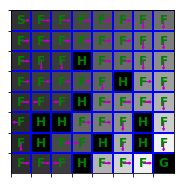

In [13]:
from IPython.display import clear_output
from time import sleep
import matplotlib.pyplot as plt
%matplotlib inline
mdp = FrozenLakeEnv(map_name='8x8',slip_chance=0.1)
state_values = {s : 0 for s in mdp.get_all_states()}

for i in range(30):
    clear_output(True)
    print("after iteration %i"%i)
    state_values = value_iteration(mdp, 
                            state_values, num_iter=1)
    draw_policy(mdp, state_values)
    sleep(0.5)

Тестируем на различных вариантах окружения.

In [14]:
# Получаем среднее вознаграждение агента
mdp = FrozenLakeEnv(slip_chance=0.2, map_name='8x8')
state_values = value_iteration(mdp)

total_rewards = []
for game_i in range(1000):
    s = mdp.reset()
    rewards = []
    for t in range(100):
        # выполняем оптимальное действие в окружении
        # s, r, done, _ = 
        #~~~~~~~~~~ Решение ~~~~~~~~~~~~~~~
        
         
        s, r, done, _ = mdp.step(get_optimal_action(mdp, state_values, s, 0.9))
        
        #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
        
        rewards.append(r)
        if done: break
    total_rewards.append(np.sum(rewards))
    
print("Cреднее вознаграждение:", np.mean(total_rewards))
assert(0.6 <= np.mean(total_rewards) <= 0.8)
print("Принято!")

iter    0 | diff: 0.80000 | V(start): 0.000 
iter    1 | diff: 0.57600 | V(start): 0.000 
iter    2 | diff: 0.41472 | V(start): 0.000 
iter    3 | diff: 0.29860 | V(start): 0.000 
iter    4 | diff: 0.24186 | V(start): 0.000 
iter    5 | diff: 0.19349 | V(start): 0.000 
iter    6 | diff: 0.15325 | V(start): 0.000 
iter    7 | diff: 0.12288 | V(start): 0.000 
iter    8 | diff: 0.09930 | V(start): 0.000 
iter    9 | diff: 0.08037 | V(start): 0.000 
iter   10 | diff: 0.06426 | V(start): 0.000 
iter   11 | diff: 0.05129 | V(start): 0.000 
iter   12 | diff: 0.04330 | V(start): 0.000 
iter   13 | diff: 0.03802 | V(start): 0.033 
iter   14 | diff: 0.03332 | V(start): 0.058 
iter   15 | diff: 0.02910 | V(start): 0.087 
iter   16 | diff: 0.01855 | V(start): 0.106 
iter   17 | diff: 0.01403 | V(start): 0.120 
iter   18 | diff: 0.00810 | V(start): 0.128 
iter   19 | diff: 0.00555 | V(start): 0.133 
iter   20 | diff: 0.00321 | V(start): 0.137 
iter   21 | diff: 0.00247 | V(start): 0.138 
iter   22 

### Задание 3

Теперь рассмотрим следующий алгоритм - итерации по стратегиям (PI):
\begin{enumerate}
    \item Инициализация $\pi_0$   (например случайные действия)
    \item For $n=0, 1, 2, \dots$
    \item Вычисление state-value функции $V^{\pi_{n}}$
    \item Используя $V^{\pi_{n}}$, рассчитываем функцию $Q^{\pi_{n}}$
    \item Рассчитываем новую стратегию $\pi_{n+1}(s) = \operatorname*{argmax}_a Q^{\pi_{n}}(s,a)$
\end{enumerate}

PI включает в себя оценку полезности состояния как внутренний шаг.

Вначале оценим полезности, используя текущую стратегию:
$$V^{\pi}(s) = \sum_{s'} P(s,\pi(s),s')[ R(s,\pi(s),s') + \gamma V^{\pi}(s')]$$
    Мы будем искать точное решение, хотя могли использовать и предыдущий итерационный подход. Для этого будем решать систему линейных уравнений относительно $V^{\pi}(s_i)$ с помощью np.linalg.solve.

In [15]:
from numpy.linalg import solve

def compute_vpi(mdp, policy, gamma):
    """
    Считем V^pi(s) для всех состояний, согласно стратегии.
    :param policy: словарь состояние->действие {s : a}
    :returns: словарь {state : V^pi(state)}
    """
    states = mdp.get_all_states()
    A, b = [], []
    for i, state in enumerate(states):
        if state in policy:
            a = policy[state]
            # формируем матрицу A (... A.append(...))
            #~~~~~~~~~~ Решение ~~~~~~~~~~~~~~~
            
             
            A.append([(1-gamma * mdp.get_transition_prob(state, a, s) if i == j else -gamma * mdp.get_transition_prob(state, a, s)) 
                  for j, s in enumerate(states)])
            
            #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
            
            # и вектор b (b.append(...))
            #~~~~~~~~~~ Решение ~~~~~~~~~~~~~~~
            
             
            b.append(sum([prob * mdp.get_reward(state, a, next_state) 
                      for next_state, prob in mdp.get_next_states(state, a).items()]))
            
            #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
            
        else:
            # формируем матрицу A (... A.append(...))
            #~~~~~~~~~~ Решение ~~~~~~~~~~~~~~~
            
             
            A.append([(1 if i == j else 0) for j, s in enumerate(states)])
            
            #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
            
            # вектор b (b.append(...))
            #~~~~~~~~~~ Решение ~~~~~~~~~~~~~~~
            
             
            b.append(0)
            
            #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
            
    A = np.array(A)
    b = np.array(b)
    
    values = solve(A, b)
    
    state_values = {states[i] : values[i] 
                    for i in range(len(states))}
    return state_values

In [16]:
transition_probs = {
    's0': {
        'a0': {'s0': 0.5, 's2': 0.5},
        'a1': {'s2': 1}
    },
    's1': {
        'a0': {'s0': 0.7, 's1': 0.1, 's2': 0.2},
        'a1': {'s1': 0.95, 's2': 0.05}
    },
    's2': {
        'a0': {'s0': 0.4, 's1': 0.6},
        'a1': {'s0': 0.3, 's1': 0.3, 's2': 0.4}
    }
}
rewards = {
    's1': {'a0': {'s0': +5}},
    's2': {'a1': {'s0': -1}}
}
mdp = MDP(transition_probs, rewards, initial_state='s0')

gamma = 0.9  # коэффициент дисконтирования для MDP

test_policy = {
    s: np.random.choice(mdp.get_possible_actions(s))
    for s in mdp.get_all_states()}
new_vpi = compute_vpi(mdp, test_policy, gamma)

print(new_vpi)
assert type(new_vpi) is dict, \
    "функция compute_vpi должна возвращать словарь \
    {состояние s : V^pi(s) }"

{'s0': -0.7320493642483172, 's1': -0.27767389678384435, 's2': -0.8947270007479434}


Теперь обновляем стратегию на основе новых значений полезностей:

In [17]:
def compute_new_policy(mdp, vpi, gamma):
    """
    Рассчитываем новую стратегию
    :param vpi: словарь {state : V^pi(state) }
    :returns: словарь {state : оптимальное действие}
    """
    Q = {}
    for state in mdp.get_all_states():
        Q[state] = {}
        for a in mdp.get_possible_actions(state):
            values = []
            for next_state in mdp.get_next_states(state,
                                                  a):
                r = mdp.get_reward(state, a, next_state)
                p = mdp.get_transition_prob(state, a,
                                            next_state)
                # values.append(...)
                #~~~~~~~~~~ Решение ~~~~~~~~~~~~~~~
                
                 
                values.append(
                    p * (r + gamma * vpi[next_state]))
                
                #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                
            Q[state][a] = sum(values)

    policy = {}
    for state in mdp.get_all_states():
        actions = mdp.get_possible_actions(state)
        if actions:
            # выбираем оптимальное действие в state
            # policy[state] = ... 
            #~~~~~~~~~~ Решение ~~~~~~~~~~~~~~~
            
             
            i = actions[0]
            for a in actions:
                if Q[state][a] > Q[state][i]:
                    i = a
            policy[state] = i
            
            #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
            
    return policy

In [18]:
new_policy = compute_new_policy(mdp, new_vpi, gamma)

print(new_policy)

assert type(new_policy) is dict, \
"функция compute_new_policy должна возвращать словарь \
{состояние s: оптимальное действие}"

{'s0': 'a0', 's1': 'a0', 's2': 'a0'}


Собираем все в единый цикл:

In [19]:
def policy_iteration(mdp, policy=None, gamma = 0.9, 
                 num_iter = 1000, min_difference = 1e-5):
    """ 
    Запускаем цикл итерации по стратегиям 
    Если стратегия не определена, задаем случайную
    """
    for i in range(num_iter):
        if not policy:
            policy = {}
            for s in mdp.get_all_states():
                if mdp.get_possible_actions(s):
                    policy[s] = np.random \
                    .choice(mdp.get_possible_actions(s))
        # state_values = 
        #~~~~~~~~~~ Решение ~~~~~~~~~~~~~~~
        
         
        state_values = compute_vpi(mdp, policy, gamma)
        
        #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
        
        # policy = 
        #~~~~~~~~~~ Решение ~~~~~~~~~~~~~~~
        
         
        policy = compute_new_policy(mdp, state_values, gamma)    
        
        #~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
        
    return state_values, policy

Тестируем на FrozenLake.

In [20]:
mdp = FrozenLakeEnv(slip_chance=0.1)
state_values, policy = policy_iteration(mdp)

total_rewards = []
for game_i in range(1000):
    s = mdp.reset()
    rewards = []
    for t in range(100):
        s, r, done, _ = mdp.step(policy[s])
        rewards.append(r)
        if done: break
    total_rewards.append(np.sum(rewards))
    
print("average reward: ", np.mean(total_rewards))
assert(0.8 <= np.mean(total_rewards) <= 0.95)
print("Принято!")

average reward:  0.892
Принято!
